In [345]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.48 s (started: 2021-09-23 19:04:02 +00:00)


In [346]:
iris_path = "/content/drive/MyDrive/Colab Notebooks/data/Iris.csv"
house_path = "/content/drive/MyDrive/Colab-Notebooks/data/house-price/train.csv"

time: 1.27 ms (started: 2021-09-23 19:04:06 +00:00)


In [347]:
import tensorflow as tf
import numpy as np

time: 1.34 ms (started: 2021-09-23 19:04:06 +00:00)


In [348]:
import matplotlib.pyplot as plt

def plot_history(title, loss, val_loss, loss_unit, metric, val_metric, metric_unit):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    fig.suptitle(title)

    axes[0].plot(loss, label='train')
    axes[0].plot(val_loss, label='val')
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel(loss_unit)
    axes[0].legend()

    axes[1].plot(metric, label='train')
    axes[1].plot(val_metric, label='val')
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel(metric_unit)
    axes[1].legend()

    #fig.tight_layout()

time: 25.7 ms (started: 2021-09-23 19:04:06 +00:00)


<h2>[Problem 1] Sharing and executing the official tutorial model</h2>

I use the beginner quickstart model that Tensorflow introduces. This model classifies MNIST dataset. <br>
<a href="https://www.tensorflow.org/tutorials/quickstart/beginner" target="_blank"> Reference </a>

In [349]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)
time: 752 ms (started: 2021-09-23 19:04:06 +00:00)


In [350]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
])

print(type(model))

<class 'keras.engine.sequential.Sequential'>
time: 52.4 ms (started: 2021-09-23 19:04:06 +00:00)


return logits

In [351]:
predictions = model(x_train[:1]).numpy()
print(predictions)
print(predictions.shape)

[[ 0.5412797  -0.6978946   0.15543613  0.08519861  0.26008964 -0.37616128
   0.65895605 -0.41414893  0.26599073  0.38941693]]
(1, 10)
time: 11.6 ms (started: 2021-09-23 19:04:07 +00:00)


apply softmax

In [352]:
tf.nn.softmax(predictions).numpy()

array([[0.14522907, 0.04206172, 0.09873789, 0.09204073, 0.10963123,
        0.05802484, 0.16336527, 0.05586196, 0.11028008, 0.12476719]],
      dtype=float32)

time: 6.12 ms (started: 2021-09-23 19:04:07 +00:00)


In [353]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

time: 1.89 ms (started: 2021-09-23 19:04:07 +00:00)


In [354]:
loss_val = loss_fn(y_train[:1], predictions).numpy()
print(loss_val)

2.846884
time: 7.81 ms (started: 2021-09-23 19:04:07 +00:00)


=> This is the loss at "random" state because the model have not trained.

Training step

In [355]:
model.compile(
    optimizer='adam',
    loss = loss_fn,
    metrics=['accuracy'])

time: 11.2 ms (started: 2021-09-23 19:04:07 +00:00)


In [356]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2965 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1439 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1081 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9768
time: 30.8 s (started: 2021-09-23 19:04:07 +00:00)


evaluating step

In [357]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0740 - accuracy: 0.9774


[0.07398052513599396, 0.977400004863739]

time: 876 ms (started: 2021-09-23 19:04:37 +00:00)


<h2>[Problem 3] Learning Iris (binary classification) with Keras</h2>

<h3>Preprocessing</h3>

In [358]:
"""
Binary classification of Iris dataset using neural network implemented in TensorFlow
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#Load dataset
df = pd.read_csv(iris_path)
display(df.shape)

(150, 6)

time: 16.2 ms (started: 2021-09-23 19:04:38 +00:00)


In [359]:
#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
display(X.shape)
display(y.shape)

(100, 4)

(100,)

time: 18.3 ms (started: 2021-09-23 19:04:38 +00:00)


In [360]:
# NumPy 配列に変換
X = np.array(X)
y = np.array(y)

# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
display(y.shape)

(100, 1)

time: 9.58 ms (started: 2021-09-23 19:04:38 +00:00)


In [361]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X_test.shape:   {}".format(X_test.shape))
print("y_test.shape:   {}".format(y_test.shape))
print("X_train.shape:   {}".format(X_train.shape))
print("y_train.shape:   {}".format(y_train.shape))
print("X_val.shape:   {}".format(X_val.shape))
print("y_val.shape:   {}".format(y_val.shape))

X_test.shape:   (20, 4)
y_test.shape:   (20, 1)
X_train.shape:   (64, 4)
y_train.shape:   (64, 1)
X_val.shape:   (16, 4)
y_val.shape:   (16, 1)
time: 20.2 ms (started: 2021-09-23 19:04:38 +00:00)


<h3>Training</h3>

In [362]:
# Hyperparameter settings
learning_rate = 0.001
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

time: 6.02 ms (started: 2021-09-23 19:04:38 +00:00)


In [363]:
#logits
binary_iris_model_logits = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(n_input, )),
                                    tf.keras.layers.Dense(n_hidden1, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.Dense(n_hidden2, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    #tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(n_classes)
])

time: 56.6 ms (started: 2021-09-23 19:04:38 +00:00)


In [364]:
binary_iris_model_logits.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_81 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_82 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
time: 13.2 ms (started: 2021-09-23 19:04:39 +00:00)


In [365]:
binary_iris_model = tf.keras.models.Sequential([
                                    binary_iris_model_logits,
                                    tf.keras.layers.Activation(tf.nn.sigmoid)
])

time: 31.4 ms (started: 2021-09-23 19:04:39 +00:00)


In [366]:
binary_iris_model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_57 (Sequential)   (None, 1)                 5451      
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________
time: 4.66 ms (started: 2021-09-23 19:04:39 +00:00)


In [367]:
binary_iris_model.compile(
            loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics=['accuracy'])

time: 19 ms (started: 2021-09-23 19:04:39 +00:00)


In [368]:
history = binary_iris_model.fit(
        x=X_train, 
        y=y_train, 
        batch_size=batch_size, 
        epochs=num_epochs, 
        validation_data=(X_val, y_val)
        )

Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 0.8018 - accuracy: 0.3594 - val_loss: 0.7376 - val_accuracy: 0.3750
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7076 - accuracy: 0.4844 - val_loss: 0.6782 - val_accuracy: 0.4375
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6533 - accuracy: 0.6250 - val_loss: 0.6470 - val_accuracy: 0.4375
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5948 - accuracy: 0.7500 - val_loss: 0.6164 - val_accuracy: 0.5625
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5837 - accuracy: 0.6094 - val_loss: 0.5254 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5355 - accuracy: 0.7656 - val_loss: 0.5080 - val_accuracy: 0.8750
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4845 - accuracy: 0.8438 - val_loss: 0.5126 - val_accuracy: 0.7500
Epoch 8/100
7/7 [========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


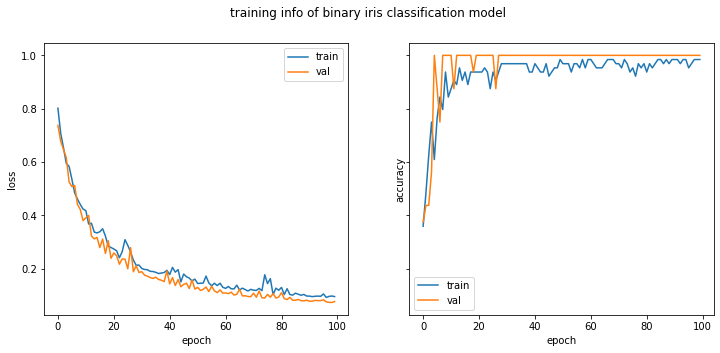

time: 473 ms (started: 2021-09-23 19:04:45 +00:00)


In [369]:
print(history.history.keys())
plot_history(
    "training info of binary iris classification model", 
    history.history['loss'], 
    history.history['val_loss'], 
    "loss", 
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    "accuracy"
    )

In [370]:
binary_iris_model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.2570 - accuracy: 0.9000


[0.2569621503353119, 0.8999999761581421]

time: 68.7 ms (started: 2021-09-23 19:04:46 +00:00)


<h2>[Problem 4] Learn Iris (multi-level classification) with Keras</h2>

<h3>Preprocessing</h3>

In [371]:
"""
Trinary classification of Iris dataset using neural network implemented in TensorFlow
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#Load dataset
df = pd.read_csv(iris_path)
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

time: 17.4 ms (started: 2021-09-23 19:04:46 +00:00)


In [372]:
#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
display(y.shape)
display(X.shape)

(150,)

(150, 4)

time: 12.4 ms (started: 2021-09-23 19:04:46 +00:00)


In [373]:
# Convert label to one hot
y = pd.get_dummies(y)

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)

y = y.astype(np.int64)
display(y.shape)

(150, 3)

time: 10.9 ms (started: 2021-09-23 19:04:46 +00:00)


In [374]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

time: 7.09 ms (started: 2021-09-23 19:04:46 +00:00)


<h3>Training</h3>

In [375]:
# Hyperparameter settings
learning_rate = 0.001
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

time: 4.58 ms (started: 2021-09-23 19:04:46 +00:00)


In [376]:
#logits
nary_iris_model_logits = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(n_input, )),
                                    tf.keras.layers.Dense(n_hidden1, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.Dense(n_hidden2, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.Dense(n_classes)
])

time: 54.4 ms (started: 2021-09-23 19:04:46 +00:00)


In [377]:
nary_iris_model_logits.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_84 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_85 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_86 (Dense)             (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________
time: 5.08 ms (started: 2021-09-23 19:04:46 +00:00)


In [378]:
nary_iris_model = tf.keras.models.Sequential([
                                    nary_iris_model_logits,
                                    tf.keras.layers.Activation(tf.nn.softmax)
])

time: 39.4 ms (started: 2021-09-23 19:04:46 +00:00)


In [379]:
nary_iris_model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_59 (Sequential)   (None, 3)                 5653      
_________________________________________________________________
activation_16 (Activation)   (None, 3)                 0         
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________
time: 4.15 ms (started: 2021-09-23 19:04:46 +00:00)


In [380]:
nary_iris_model.compile(
            loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics=['accuracy'])

time: 28.5 ms (started: 2021-09-23 19:04:46 +00:00)


In [381]:
history = nary_iris_model.fit(
        x=X_train, 
        y=y_train, 
        batch_size=batch_size, 
        epochs=num_epochs, 
        validation_data=(X_val, y_val)
        )

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.7939 - accuracy: 0.6979 - val_loss: 0.7382 - val_accuracy: 0.7083
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5238 - accuracy: 0.8021 - val_loss: 0.5568 - val_accuracy: 0.5833
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4696 - accuracy: 0.7604 - val_loss: 0.5362 - val_accuracy: 0.6667
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3987 - accuracy: 0.8542 - val_loss: 0.5326 - val_accuracy: 0.7083
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3758 - accuracy: 0.8333 - val_loss: 0.4702 - val_accuracy: 0.7500
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.8438 - val_loss: 0.4543 - val_accuracy: 0.7500
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3224 - accuracy: 0.9062 - val_loss: 0.4907 - val_accuracy: 0.7083
Epoch 8/100


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


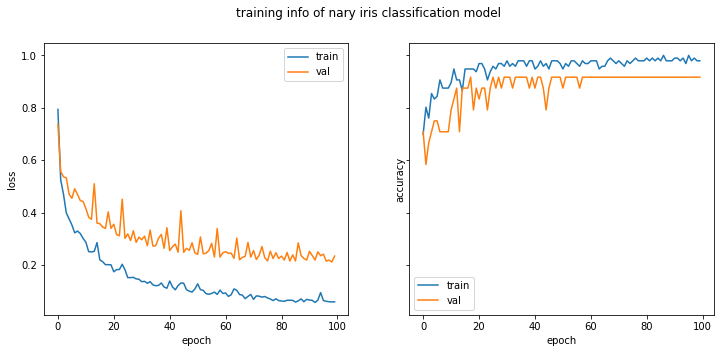

time: 20.8 s (started: 2021-09-23 19:04:53 +00:00)


In [382]:
print(history.history.keys())
plot_history(
    "training info of nary iris classification model", 
    history.history['loss'], 
    history.history['val_loss'], 
    "loss", 
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    "accuracy"
    )

In [383]:
nary_iris_model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0656 - accuracy: 1.0000


[0.06557019799947739, 1.0]

time: 99.3 ms (started: 2021-09-23 19:05:14 +00:00)


<h2>[Problem 5] Learning House Prices with Keras</h2>

<h3>Preprocessing</h3>

In [384]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#Load dataset
df = pd.read_csv(house_path)
df["SalePrice"].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

time: 67.2 ms (started: 2021-09-23 19:05:14 +00:00)


In [385]:
#Condition extraction from data frame
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
display(y.shape)
display(X.shape)

(1460,)

(1460, 2)

time: 18.7 ms (started: 2021-09-23 19:05:14 +00:00)


In [386]:
# NumPy 配列に変換
X = np.array(X)
y = np.array(y)

y = y.astype(np.int64)

#X = np.log1p(X)
#y = np.log1p(y)
#=> use this to minimize mean square error value to easier to see.

display(y.shape)
display(y[:5])

(1460,)

array([208500, 181500, 223500, 140000, 250000])

time: 25.8 ms (started: 2021-09-23 19:05:14 +00:00)


In [387]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

time: 9.44 ms (started: 2021-09-23 19:05:14 +00:00)


In [388]:
#do standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

display(X_train[:5, :])

array([[-0.80043595, -1.318735  ],
       [ 0.87578699, -1.93738445],
       [-0.02107061,  1.22098379],
       [ 0.28049286, -1.18849301],
       [-0.16989415,  0.96049981]])

time: 14.9 ms (started: 2021-09-23 19:05:14 +00:00)


<h3>Training</h3>

In [389]:
# Hyperparameter settings
learning_rate = 0.001
batch_size = 10
num_epochs = 100
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

time: 6.44 ms (started: 2021-09-23 19:05:14 +00:00)


In [390]:
#logits
house_price_model_logits = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(n_input, )),
                                    tf.keras.layers.Dense(n_hidden1, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.Dense(n_hidden2, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.Dense(n_classes)
])

time: 81.9 ms (started: 2021-09-23 19:05:14 +00:00)


In [391]:
house_price_model_logits.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 2)                 0         
_________________________________________________________________
dense_87 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_88 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 101       
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________
time: 14.4 ms (started: 2021-09-23 19:05:14 +00:00)


In [392]:
house_price_model = tf.keras.models.Sequential([
                                    house_price_model_logits
])

time: 38.3 ms (started: 2021-09-23 19:05:14 +00:00)


In [393]:
house_price_model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_61 (Sequential)   (None, 1)                 5351      
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________
time: 10.5 ms (started: 2021-09-23 19:05:14 +00:00)


In [394]:
house_price_model.compile(
            loss='mean_squared_logarithmic_error',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics=['mean_squared_logarithmic_error'])

time: 15.8 ms (started: 2021-09-23 19:05:14 +00:00)


In [395]:
history = house_price_model.fit(
        x=X_train, 
        y=y_train, 
        batch_size=batch_size, 
        epochs=num_epochs, 
        validation_data=(X_val, y_val)
        )

Epoch 1/100
94/94 [==============================] - 1s 7ms/step - loss: 101.3570 - mean_squared_logarithmic_error: 101.3570 - val_loss: 83.2501 - val_mean_squared_logarithmic_error: 83.2501
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 75.2208 - mean_squared_logarithmic_error: 75.2208 - val_loss: 66.5196 - val_mean_squared_logarithmic_error: 66.5196
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 62.2078 - mean_squared_logarithmic_error: 62.2078 - val_loss: 56.5849 - val_mean_squared_logarithmic_error: 56.5849
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 53.7788 - mean_squared_logarithmic_error: 53.7788 - val_loss: 49.6860 - val_mean_squared_logarithmic_error: 49.6860
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 47.7518 - mean_squared_logarithmic_error: 47.7518 - val_loss: 44.5643 - val_mean_squared_logarithmic_error: 44.5643
Epoch 6/100
94/94 [==============================] - 

dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])


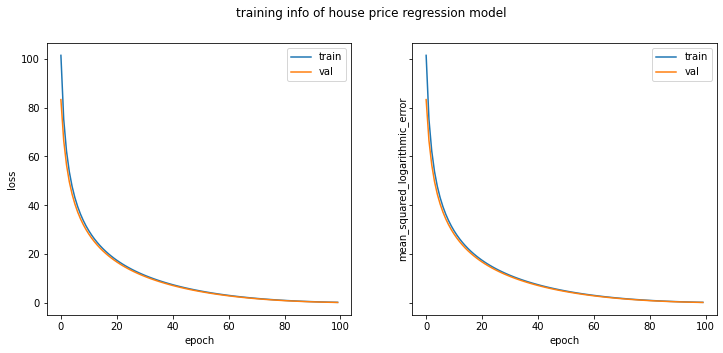

time: 573 ms (started: 2021-09-23 19:05:51 +00:00)


In [396]:
print(history.history.keys())
plot_history(
    "training info of house price regression model", 
    history.history['loss'], 
    history.history['val_loss'], 
    "loss", 
    history.history['mean_squared_logarithmic_error'], 
    history.history['val_mean_squared_logarithmic_error'], 
    "mean_squared_logarithmic_error"
    )

In [397]:
house_price_model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - loss: 0.2851 - mean_squared_logarithmic_error: 0.2851


[0.28510406613349915, 0.28510406613349915]

time: 108 ms (started: 2021-09-23 19:05:52 +00:00)


<h2>[Problem 6] Learning MNIST with Keras</h2>

<h3>Preprocessing</h3>

In [398]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

time: 455 ms (started: 2021-09-23 19:05:52 +00:00)


In [399]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
display(X_train.shape)
display(X_test.shape)

(60000, 784)

(10000, 784)

time: 19.7 ms (started: 2021-09-23 19:05:53 +00:00)


In [400]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

time: 186 ms (started: 2021-09-23 19:05:53 +00:00)


In [401]:
# Convert label to one hot
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# NumPy 配列に変換
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

display(y_train.shape)
display(y_test.shape)

display(y_train[:5, :])

(60000, 10)

(10000, 10)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

time: 34 ms (started: 2021-09-23 19:05:53 +00:00)


In [402]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

time: 440 ms (started: 2021-09-23 19:05:53 +00:00)


<h3>Training using LeNet</h3>

In [403]:
# Hyperparameter settings
learning_rate = 0.001
batch_size = 20
num_epochs = 10
n_hidden1 = 120
n_hidden2 = 84
n_input = X_train.shape[-1]
n_samples = X_train.shape[0]
n_classes = 10

time: 5.78 ms (started: 2021-09-23 19:05:53 +00:00)


In [404]:
mnist_logits = tf.keras.models.Sequential([
                                    #cnn
                                    tf.keras.layers.Reshape((28, 28, 1), input_shape=(n_input, )), #1@28x28
                                    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),    
                                    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    #nn
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(n_hidden1, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.Dense(n_hidden2, kernel_initializer='he_uniform', bias_initializer='random_normal', activation='relu'),
                                    tf.keras.layers.Dense(n_classes)
])

mnist_logits.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 120)             

In [405]:
mnist_model = tf.keras.models.Sequential([
                                mnist_logits,
                                tf.keras.layers.Activation(tf.nn.softmax)
])

mnist_model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_63 (Sequential)   (None, 10)                44426     
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
_________________________________________________________________
time: 81.5 ms (started: 2021-09-23 19:05:53 +00:00)


In [406]:
mnist_model.compile(
            loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics=['accuracy'])

time: 14.7 ms (started: 2021-09-23 19:05:54 +00:00)


In [407]:
history = mnist_model.fit(
        x=X_train, 
        y=y_train, 
        batch_size=batch_size, 
        epochs=num_epochs, 
        validation_data=(X_val, y_val)
        )

Epoch 1/10
2400/2400 [==============================] - 39s 16ms/step - loss: 0.1919 - accuracy: 0.9419 - val_loss: 0.0908 - val_accuracy: 0.9707
Epoch 2/10
2400/2400 [==============================] - 35s 14ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0587 - val_accuracy: 0.9818
Epoch 3/10
2400/2400 [==============================] - 33s 14ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 4/10
2400/2400 [==============================] - 33s 14ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 5/10
2400/2400 [==============================] - 33s 14ms/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.0479 - val_accuracy: 0.9858
Epoch 6/10
2400/2400 [==============================] - 33s 14ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0419 - val_accuracy: 0.9876
Epoch 7/10
2400/2400 [==============================] - 33s 14ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0528 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


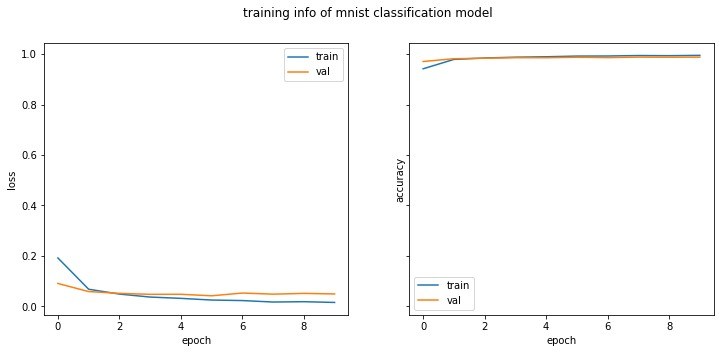

time: 403 ms (started: 2021-09-23 19:12:16 +00:00)


In [408]:
print(history.history.keys())
plot_history(
    "training info of mnist classification model", 
    history.history['loss'], 
    history.history['val_loss'], 
    "loss", 
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    "accuracy"
    )

=> a little bit overfit

In [409]:
mnist_model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0438 - accuracy: 0.9889


[0.043796248733997345, 0.9889000058174133]

time: 2.39 s (started: 2021-09-23 19:12:17 +00:00)
